# How are in-demand skills trending for data analysts?
* Methology
1. Aggregate skill count monthy
2. Re-analyze based on precentage of total jobs
3. Plot the monthly skill demands

In [1]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns
#loading dataset 
ds=load_dataset('lukebarousse/data_jobs')
df=ds['train'].to_pandas()
#converting job_posted_date to datetime format(data cleaning step)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else  x)

c:\Users\felix\anaconda3\envs\python_cource\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_us=df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

In [3]:
df_us['job_posted_month'] = df_us['job_posted_date'].dt.month
df_us_exploded=df_us.explode('job_skills')

In [4]:
df_us_pivot=df_us_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_us_pivot.loc['total']=df_us_pivot.sum()
df_us_pivot=df_us_pivot[df_us_pivot.loc['total'].sort_values(ascending=False).index]
df_us_pivot.drop('total', inplace=True)


In [5]:
df_us_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_total=df_us.groupby('job_posted_month').size()

In [7]:
df_us_per=df_us_pivot.div(df_total, axis=0) * 100

In [8]:
df_us_per=df_us_per.reset_index()
df_us_per['job_month']=df_us_per['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_us_per=df_us_per.set_index('job_month')
df_us_per.drop('job_posted_month', inplace=True, axis=1)

In [9]:
df_us_per

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
df_plot=df_us_per.iloc[:, :5]  # Select top 5 skills for plotting
df_plot

job_skills,sql,excel,tableau,python,sas
job_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


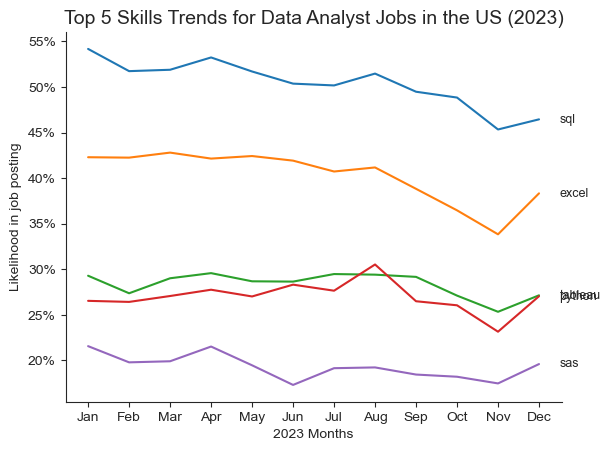

In [13]:
sns.lineplot(data=df_plot,dashes=False,palette='tab10')
sns.set_style('ticks')
plt.title('Top 5 Skills Trends for Data Analyst Jobs in the US (2023)', fontsize=14)
plt.ylabel('Likelihood in job posting')
plt.xlabel('2023 Months')
plt.legend().remove()
sns.despine()
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
   plt.text(11.5, df_plot.iloc[-1, i], df_plot.columns[i], fontsize=9, va='center')
#offsets = {
  #  'Python': 0.5,
   # 'SQL': -0.5,
    #'Excel': 0.5,
    #'Tableau': -0.5,
    #'Sas': 0.5
#}
#for i, col in enumerate(df_plot.columns):
    #plt.text(df_plot.index[-1],df_plot.iloc[-1,i] + offsets.get(col, 0), col, fontsize=9, va='center')
